# `ATHENA TAKEAWAY ASSIGNMENT`

### BY Florence Nguuni



1. **Funded Amount vs. Loan Amount Ratio:**
   - **Metric**: Calculate the ratio of funded amount to loan amount for each loan. This can be expressed as a percentage.
   - **Explanation**: This metric provides insight into the extent to which loans are being fully funded. A high ratio indicates that most loans are fully funded, while a low ratio suggests that loans are typically underfunded.
   - **Pros**:
     - Helps identify the effectiveness of fundraising efforts.
     - Can highlight potential issues with loan funding that may require adjustments.
   - **Cons**:
     - It doesn't take into account the impact of loan terms or interest rates on funding levels.
  
2. **Demographic Analysis:**
   - **Metric**: Explore borrower demographics, such as gender, region, age, etc., to assess their impact on loan performance or funding rates.
   - **Explanation**: Demographic analysis involves examining the influence of borrower characteristics on loan outcomes. It helps in understanding how different demographics affect the success of loans and informs decision-making for targeted lending strategies.
   - **Pros**:
     - **Risk Assessment**: Demographic analysis aids in evaluating the risk associated with various borrower segments, enhancing risk management.
     - **Tailored Loan Products**: Insights from demographic analysis inform the design of customized loan products, leading to improved loan uptake and repayment rates.
     - **Targeted Marketing**: Understanding borrower demographics enables precise marketing and outreach, reaching the right audience effectively.
     - **Social Impact**: By identifying the groups benefiting the most from loans, demographic analysis showcases the social impact of lending, potentially enhancing social responsibility.
   - **Cons**:
     - **Data Privacy and Ethical Concerns**: The responsible handling of sensitive demographic data is essential to address data privacy and ethical considerations.
     - **Data Quality and Availability**: Variability in data quality and availability can limit the analysis, as demographic data may be incomplete or inaccurate.
     - **Overgeneralization**: Demographic analysis can lead to overgeneralization, assuming uniform behavior within a group, whereas individuals within a demographic group may exhibit diverse characteristics.
     - **Complexity**: Analyzing demographic data can be complex, often requiring statistical expertise and resources due to large datasets.
     - **Causation vs. Correlation**: While correlations can be identified, establishing causation can be challenging, as borrower behavior may be influenced by factors beyond demographics.




In [453]:
# loading libraries

import pandas as pd
import numpy as np
import seaborn as sns
import folium
from geopandas.tools import geocode
from geopy.geocoders import Nominatim
import plotly.express as px


In [454]:
# Loading the data sets

loan_df = pd.read_csv('kiva_loan.csv')
mpi_region_loc = pd.read_csv('kiva_mpi_region_locations.csv')
loan_theme_id = pd.read_csv('loan_theme_id.csv')
loan_theme_by_region = pd.read_csv('loan_themes_by_reg.csv')



In [455]:
def shape_checker(dataset, dataset_name):
    # Calculate the shape (number of rows and columns) of the input DataFrame.
    shape = dataset.shape

    # Print the dataset name.
    print(f"Dataset name: {dataset_name}")

    # Print the shape of the DataFrame.
    print(f"DataFrame shape: {shape}")

    # Add a separator for clarity.
    print('******************')

In [456]:

# Define a dictionary to hold dataset names as keys and their corresponding DataFrames as values.

datasets = {
    'loan_df': loan_df,
    'mpi_region_loc': mpi_region_loc,
    'loan_theme_id': loan_theme_id,
    'loan_theme_by_region': loan_theme_by_region
}

# Iterate through the datasets dictionary to check the shape and head of each dataset.

for dataset_name, dataset in datasets.items():
    # Print a message indicating which dataset is being checked.
    print(f"Checking {dataset_name}:")

    # Call the shape_checker function to display the shape of the dataset.
    shape_checker(dataset, dataset_name)

    # Add a newline for separation between dataset checks.
    print('\n')


Checking loan_df:
Dataset name: loan_df
DataFrame shape: (671205, 20)
******************


Checking mpi_region_loc:
Dataset name: mpi_region_loc
DataFrame shape: (2772, 9)
******************


Checking loan_theme_id:
Dataset name: loan_theme_id
DataFrame shape: (779092, 4)
******************


Checking loan_theme_by_region:
Dataset name: loan_theme_by_region
DataFrame shape: (15736, 21)
******************




In [457]:
# checking the first five rows

loan_df.head()

,id,funded_amount,loan_amount,activity,sector,use,country_code,country,region,currency,partner_id,posted_time,disbursed_time,funded_time,term_in_months,lender_count,tags,borrower_genders,repayment_interval,date
0,653051,300.0,300.0,Fruits & Vegetables,Food,"To buy seasonal, fresh fruits to sell.",PK,Pakistan,Lahore,PKR,247.0,2014-01-01 06:12:39+00:00,2013-12-17 08:00:00+00:00,2014-01-02 10:06:32+00:00,12.0,12,NaN,female,irregular,2014-01-01
1,653053,575.0,575.0,Rickshaw,Transportation,to repair and maintain the auto rickshaw used ...,PK,Pakistan,Lahore,PKR,247.0,2014-01-01 06:51:08+00:00,2013-12-17 08:00:00+00:00,2014-01-02 09:17:23+00:00,11.0,14,NaN,"female, female",irregular,2014-01-01
2,653068,150.0,150.0,Transportation,Transportation,To repair their old cycle-van and buy another ...,IN,India,Maynaguri,INR,334.0,2014-01-01 09:58:07+00:00,2013-12-17 08:00:00+00:00,2014-01-01 16:01:36+00:00,43.0,6,"user_favorite, user_favorite",female,bullet,2014-01-01
3,653063,200.0,200.0,Embroidery,Arts,to purchase an embroidery machine and a variet...,PK,Pakistan,Lahore,PKR,247.0,2014-01-01 08:03:11+00:00,2013-12-24 08:00:00+00:00,2014-01-01 13:00:00+00:00,11.0,8,NaN,female,irregular,2014-01-01
4,653084,400.0,400.0,Milk Sales,Food,to purchase one buffalo.,PK,Pakistan,Abdul Hakeem,PKR,245.0,2014-01-01 11:53:19+00:00,2013-12-17 08:00:00+00:00,2014-01-01 19:18:51+00:00,14.0,16,NaN,female,monthly,2014-01-01


In [458]:
# checking the first five rows

mpi_region_loc.head()

,LocationName,ISO,country,region,world_region,MPI,geo,lat,lon
0,"Badakhshan, Afghanistan",AFG,Afghanistan,Badakhshan,South Asia,0.387,"(36.7347725, 70.81199529999999)",36.734772,70.811995
1,"Badghis, Afghanistan",AFG,Afghanistan,Badghis,South Asia,0.466,"(35.1671339, 63.7695384)",35.167134,63.769538
2,"Baghlan, Afghanistan",AFG,Afghanistan,Baghlan,South Asia,0.300,"(35.8042947, 69.2877535)",35.804295,69.287754
3,"Balkh, Afghanistan",AFG,Afghanistan,Balkh,South Asia,0.301,"(36.7550603, 66.8975372)",36.755060,66.897537
4,"Bamyan, Afghanistan",AFG,Afghanistan,Bamyan,South Asia,0.325,"(34.8100067, 67.8212104)",34.810007,67.821210


In [459]:
# checking the first five rows

loan_theme_id.head()

,id,Loan Theme ID,Loan Theme Type,Partner ID
0,638631,a1050000000skGl,General,151.0
1,640322,a1050000000skGl,General,151.0
2,641006,a1050000002X1ij,Higher Education,160.0
3,641019,a1050000002X1ij,Higher Education,160.0
4,641594,a1050000002VbsW,Subsistence Agriculture,336.0


In [460]:
# checking the first five rows

loan_theme_by_region.head()

,Partner ID,Field Partner Name,sector,Loan Theme ID,Loan Theme Type,country,forkiva,region,geocode_old,ISO,...,amount,LocationName,geocode,names,geo,lat,lon,mpi_region,mpi_geo,rural_pct
0,9,KREDIT Microfinance Institution,General Financial Inclusion,a1050000000slfi,Higher Education,Cambodia,No,Banteay Meanchey,"(13.75, 103.0)",KHM,...,450,"Banteay Meanchey, Cambodia","[(13.6672596, 102.8975098)]",Banteay Meanchey Province; Cambodia,"(13.6672596, 102.8975098)",13.667260,102.897510,"Banteay Mean Chey, Cambodia","(13.6672596, 102.8975098)",90.0
1,9,KREDIT Microfinance Institution,General Financial Inclusion,a10500000068jPe,Vulnerable Populations,Cambodia,No,Battambang Province,NaN,KHM,...,20275,"Battambang Province, Cambodia","[(13.0286971, 102.989615)]",Battambang Province; Cambodia,"(13.0286971, 102.989615)",13.028697,102.989615,"Banteay Mean Chey, Cambodia","(13.6672596, 102.8975098)",90.0
2,9,KREDIT Microfinance Institution,General Financial Inclusion,a1050000000slfi,Higher Education,Cambodia,No,Battambang Province,NaN,KHM,...,9150,"Battambang Province, Cambodia","[(13.0286971, 102.989615)]",Battambang Province; Cambodia,"(13.0286971, 102.989615)",13.028697,102.989615,"Banteay Mean Chey, Cambodia","(13.6672596, 102.8975098)",90.0
3,9,KREDIT Microfinance Institution,General Financial Inclusion,a10500000068jPe,Vulnerable Populations,Cambodia,No,Kampong Cham Province,"(12.0, 105.5)",KHM,...,604950,"Kampong Cham Province, Cambodia","[(12.0982918, 105.3131185)]",Kampong Cham Province; Cambodia,"(12.0982918, 105.3131185)",12.098292,105.313119,"Kampong Cham, Cambodia","(11.9924294, 105.4645408)",90.0
4,9,KREDIT Microfinance Institution,General Financial Inclusion,a1050000002X1Uu,Sanitation,Cambodia,No,Kampong Cham Province,"(12.0, 105.5)",KHM,...,275,"Kampong Cham Province, Cambodia","[(12.0982918, 105.3131185)]",Kampong Cham Province; Cambodia,"(12.0982918, 105.3131185)",12.098292,105.313119,"Kampong Cham, Cambodia","(11.9924294, 105.4645408)",90.0


In [461]:
# Merging loan data with loan theme dataset

final_df = loan_df.merge(loan_theme_id, on='id', how='left')

# checking the first five rows

final_df.head()


,id,funded_amount,loan_amount,activity,sector,use,country_code,country,region,currency,...,funded_time,term_in_months,lender_count,tags,borrower_genders,repayment_interval,date,Loan Theme ID,Loan Theme Type,Partner ID
0,653051,300.0,300.0,Fruits & Vegetables,Food,"To buy seasonal, fresh fruits to sell.",PK,Pakistan,Lahore,PKR,...,2014-01-02 10:06:32+00:00,12.0,12,NaN,female,irregular,2014-01-01,NaN,NaN,NaN
1,653053,575.0,575.0,Rickshaw,Transportation,to repair and maintain the auto rickshaw used ...,PK,Pakistan,Lahore,PKR,...,2014-01-02 09:17:23+00:00,11.0,14,NaN,"female, female",irregular,2014-01-01,a1050000000sjEC,Underserved,247.0
2,653068,150.0,150.0,Transportation,Transportation,To repair their old cycle-van and buy another ...,IN,India,Maynaguri,INR,...,2014-01-01 16:01:36+00:00,43.0,6,"user_favorite, user_favorite",female,bullet,2014-01-01,a1050000002VkWz,Underserved,334.0
3,653063,200.0,200.0,Embroidery,Arts,to purchase an embroidery machine and a variet...,PK,Pakistan,Lahore,PKR,...,2014-01-01 13:00:00+00:00,11.0,8,NaN,female,irregular,2014-01-01,a1050000000sjEC,Underserved,247.0
4,653084,400.0,400.0,Milk Sales,Food,to purchase one buffalo.,PK,Pakistan,Abdul Hakeem,PKR,...,2014-01-01 19:18:51+00:00,14.0,16,NaN,female,monthly,2014-01-01,a1050000000wf22,General,245.0


In [462]:
# checking the shape

shape_checker(final_df,'final_df')

Dataset name: final_df
DataFrame shape: (671205, 23)
******************


In [463]:
# checking dataframe info

final_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 671205 entries, 0 to 671204
Data columns (total 23 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   id                  671205 non-null  int64  
 1   funded_amount       671205 non-null  float64
 2   loan_amount         671205 non-null  float64
 3   activity            671205 non-null  object 
 4   sector              671205 non-null  object 
 5   use                 666973 non-null  object 
 6   country_code        671197 non-null  object 
 7   country             671205 non-null  object 
 8   region              614405 non-null  object 
 9   currency            671205 non-null  object 
 10  partner_id          657698 non-null  float64
 11  posted_time         671205 non-null  object 
 12  disbursed_time      668809 non-null  object 
 13  funded_time         622874 non-null  object 
 14  term_in_months      671205 non-null  float64
 15  lender_count        671205 non-nul

  `Observations`
* posted_time, date and disbursed_time column will need to be changed to date time format from object dtypes

In [464]:
# checking basic stats

final_df.describe().T

,count,mean,std,min,25%,50%,75%,max
id,671205.0,993248.593734,196611.275423,653047.0,823072.0,992780.0,1163653.0,1340339.0
funded_amount,671205.0,785.995061,1130.398941,0.0,250.0,450.0,900.0,100000.0
loan_amount,671205.0,842.397107,1198.660073,25.0,275.0,500.0,1000.0,100000.0
partner_id,657698.0,178.199616,94.247581,9.0,126.0,145.0,204.0,536.0
term_in_months,671205.0,13.739022,8.598919,1.0,8.0,13.0,14.0,158.0
lender_count,671205.0,20.590922,28.459551,0.0,7.0,13.0,24.0,2986.0
Partner ID,657692.0,178.204267,94.250826,9.0,126.0,145.0,204.0,536.0


  `Observations`
* From the count we can note that there are some missing values
* The maximum funded amount and loan amounts are 100000
* Lender count maximum are 24

### <span style="color:cyan"> Data Cleaning</span>


In [465]:
def cleaner_checker(dataframe):
    # Print the number of duplicated values in the dataframe
    print('Duplicated values:', dataframe.duplicated().sum())
    print('*******')
    # Print the percentage of null values for each column in the dataframe
    print('Null values:\n', dataframe.isna().sum() / len(dataframe) * 100)

    
    

In [466]:
# checking for null and duplicated values

cleaner_checker(final_df)

Duplicated values: 0
*******
Null values:
 id                     0.000000
funded_amount          0.000000
loan_amount            0.000000
activity               0.000000
sector                 0.000000
use                    0.630508
country_code           0.001192
country                0.000000
region                 8.462392
currency               0.000000
partner_id             2.012351
posted_time            0.000000
disbursed_time         0.356970
funded_time            7.200632
term_in_months         0.000000
lender_count           0.000000
tags                  25.538546
borrower_genders       0.628869
repayment_interval     0.000000
date                   0.000000
Loan Theme ID          2.013245
Loan Theme Type        2.013245
Partner ID             2.013245
dtype: float64


In [467]:
# reviewing the tags column that has  25% missing values on the entire dataset

final_df['tags'].value_counts()

tags
user_favorite                                                                     27088
#Parent, #Woman Owned Biz                                                         16597
#Woman Owned Biz                                                                  12557
#Parent                                                                           11671
#Elderly                                                                           6482
                                                                                  ...  
volunteer_like, #Woman Owned Biz, #Widowed, #Single Parent, #Repeat Borrower          1
#Animals, #Biz Durable Asset, #Elderly, #First Loan, #Schooling, user_favorite        1
#Parent, #Repeat Borrower, #Low-profit FP, #Woman Owned Biz, #Animals                 1
#Parent, #Vegan, #Woman Owned Biz, #Schooling, #Biz Durable Asset                     1
user_favorite, #Parent, #Biz Durable Asset, #Vegan, user_favorite                     1
Name: count, Length: 86719,

`Observation / Columns to drop`
* Tags column has 25%  percent missing data, this will be dropped since it does not factor in, in our demographic analysis
* Loan Theme ID, Loan Theme Type, Partner ID  after careful consideration will dropped since they will not factor in our demographic analysis, they are well represented by other more complete columns,like sector == Loan Theme Type == Loan Theme ID

In [468]:
columns_to_drop  =  ['tags','Loan Theme ID', 'Loan Theme Type', 'Partner ID' ]

final_df.drop(columns=columns_to_drop, axis= 1, inplace= True)

In [469]:
# dropping rows of other null values

final_df.dropna(inplace=True)

cleaner_checker(final_df)

Duplicated values: 0
*******
Null values:
 id                    0.0
funded_amount         0.0
loan_amount           0.0
activity              0.0
sector                0.0
use                   0.0
country_code          0.0
country               0.0
region                0.0
currency              0.0
partner_id            0.0
posted_time           0.0
disbursed_time        0.0
funded_time           0.0
term_in_months        0.0
lender_count          0.0
borrower_genders      0.0
repayment_interval    0.0
date                  0.0
dtype: float64


`Changing the data types of my date time columns`

In [470]:
final_df[['posted_time', 'disbursed_time', 'funded_time','term_in_months', 'date' ]].info()

<class 'pandas.core.frame.DataFrame'>
Index: 574115 entries, 0 to 671186
Data columns (total 5 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   posted_time     574115 non-null  object 
 1   disbursed_time  574115 non-null  object 
 2   funded_time     574115 non-null  object 
 3   term_in_months  574115 non-null  float64
 4   date            574115 non-null  object 
dtypes: float64(1), object(4)
memory usage: 26.3+ MB


In [471]:
# List of columns to convert to datetime format
to_date = ['posted_time', 'disbursed_time', 'funded_time', 'date']

# Loop through the specified columns and convert them to datetime
for item in to_date:
    # Convert the column to datetime using pd.to_datetime()
    final_df[item] = pd.to_datetime(final_df[item])

In [472]:
# List of columns to convert to the 'yyyy-mm-dd' format
to_date = ['posted_time', 'disbursed_time', 'funded_time', 'date']

# Loop through the specified columns and format them as 'yyyy-mm-dd'
for item in to_date:
    # Use the dt.strftime() function to format the date column
    final_df[item] = final_df[item].dt.strftime('%Y-%m')


In [473]:
final_df[['posted_time', 'disbursed_time', 'funded_time','term_in_months', 'date' ]].head()

,posted_time,disbursed_time,funded_time,term_in_months,date
0,2014-01,2013-12,2014-01,12.0,2014-01
1,2014-01,2013-12,2014-01,11.0,2014-01
2,2014-01,2013-12,2014-01,43.0,2014-01
3,2014-01,2013-12,2014-01,11.0,2014-01
4,2014-01,2013-12,2014-01,14.0,2014-01


In [254]:
# checking for consistency in some of my object columns

columns_to_check = ['sector', 'activity', 'borrower_genders']

final_df['sector'].value_counts()


sector
Agriculture       157003
Food              117186
Retail            105501
Services           36244
Personal Use       34245
Education          28417
Clothing           26167
Housing            25331
Transportation     13350
Arts               10559
Health              7725
Manufacturing       5755
Construction        5433
Entertainment        614
Wholesale            585
Name: count, dtype: int64

In [255]:
# checking activity column value counts

final_df['activity'].value_counts()

activity
Farming                      64370
General Store                57127
Pigs                         25608
Personal Housing Expenses    24229
Food Production/Sales        22462
                             ...  
Technology                       6
Event Planning                   5
Celebrations                     5
Energy                           3
Adult Care                       2
Name: count, Length: 163, dtype: int64

In [256]:
# checking borrower_genders column value counts

final_df['borrower_genders'].value_counts()

borrower_genders
female                                                                                                                                                                                                                                                                                                          377744
male                                                                                                                                                                                                                                                                                                            103365
female, female                                                                                                                                                                                                                                                                                                   11410
female, female, female                            

`Observation`
* the borrower gender column already has an issue where we see the strings repeated, this needs to be corrected

In [485]:

# Replacing multiple occurrences of 'female' or 'male' with a single occurrence using regular expressions 

final_df['borrower_genders']= final_df['borrower_genders'].str.replace(r',.*', '', regex=True)

final_df['borrower_genders'].value_counts()

borrower_genders
female    454928
male      119187
Name: count, dtype: int64

### <span style="color:cyan"> EDA</span>


#### `Funded amount(USD) data by Country`

In [263]:
# Getting funded amount and loan amount data in relation to country

# Grouping the data set   

geo_loc = final_df.groupby('country').agg({'funded_amount': 'sum', 'loan_amount': 'sum'}).reset_index()
 

In [266]:
nom = Nominatim(user_agent="GetLoc")

# Geocode each location in the 'country' column and assign the result to the 'Geo' column

geo_loc['Geo'] = geo_loc['country'].apply(lambda x: nom.geocode(x) if x else None)


geo_loc.head()


,country,funded_amount,loan_amount,Geo
0,Afghanistan,14000.0,14000.0,"(افغانستان, (33.7680065, 66.2385139))"
1,Albania,1884900.0,1884900.0,"(Albania, La Guajira, RAP Caribe, Colombia, (1..."
2,Armenia,9731750.0,9731750.0,"(Armenia, Capital, Quindío, RAP Eje Cafetero, ..."
3,Azerbaijan,2220675.0,2220675.0,"(Azərbaycan, (40.3936294, 47.7872508))"
4,Belize,111975.0,111975.0,"(Belize, (16.8259793, -88.7600927))"


In [267]:
# Extract latitude from the 'Geometry' column and assign it to the 'Latitude' column

geo_loc['Latitude'] = geo_loc['Geo'].apply(lambda loc: loc.latitude if loc else None)

# Extract longitude from the 'Geometry' column and assign it to the 'Longitude' column

geo_loc['Longitude'] = geo_loc['Geo'].apply(lambda loc: loc.longitude if loc else None)

geo_loc.head()

,country,funded_amount,loan_amount,Geo,Latitude,Longitude
0,Afghanistan,14000.0,14000.0,"(افغانستان, (33.7680065, 66.2385139))",33.768006,66.238514
1,Albania,1884900.0,1884900.0,"(Albania, La Guajira, RAP Caribe, Colombia, (1...",11.244803,-72.516097
2,Armenia,9731750.0,9731750.0,"(Armenia, Capital, Quindío, RAP Eje Cafetero, ...",4.491976,-75.741351
3,Azerbaijan,2220675.0,2220675.0,"(Azərbaycan, (40.3936294, 47.7872508))",40.393629,47.787251
4,Belize,111975.0,111975.0,"(Belize, (16.8259793, -88.7600927))",16.825979,-88.760093


In [476]:
# Visual of country with largest funded amounts

m1 = folium.Map(location=[39.326234, -4.838065], tiles= 'openstreetmap', zoom_start=3)

# Define a function to determine the color based on the 'funded_amount' value where anything below 1,000,000 is green

def color_producer(val):
    if val <=1000000:
        return 'red'
    else:
        return 'green'

# Iterate through the rows in the 'geo_loc' DataFrame

for i in range(0, len(geo_loc)):
    # Create a folium Circle object and add it to a map (m1)
    folium.Circle(
        location=[geo_loc.iloc[i]['Latitude'], geo_loc.iloc[i]['Longitude']],  # Specify the location using Latitude and Longitude columns
        radius=0.018 * geo_loc.iloc[i]['funded_amount'],  # Setting the radius based on 'funded_amount' column
        color=color_producer(geo_loc.iloc[i]['funded_amount'])  # Determine the color using the color_producer function
    ).add_to(m1)  # Add the Circle object to the map 'm1'
    
m1.save('map1.html')

In [477]:
m1

`Observation`
>> We can clearly depict from the plot above:
* Kenya and Uganda in Africa are notable for their high borrowing rates, possibly due to factors such as economic conditions and a strong presence of microfinance institutions. In contrast, many Northern African countries don't appear to borrow as much, indicating potential variations in economic and financial needs within the continent.
* South America shows a cluster of countries, including Peru, Bolivia, Paraguay, and Ecuador, which collectively contribute significantly to the borrowed funds in the region. This may suggest a common need or economic activity that drives borrowing across these countries.
* South American countries exhibit a higher frequency of borrowing compared to other continents. This could indicate a higher reliance on microloans in these countries, possibly linked to entrepreneurship or specific social and economic factors.
* The observation that the Philippines is the biggest borrower in the world highlights the significance of microfinance and online lending platforms in addressing financial needs in the country. Factors contributing to this could range from entrepreneurship to financial inclusion efforts.

In [297]:
# confirming whether funded amount and loan amount are completely identical

are_identical = geo_loc['funded_amount'].equals(geo_loc['loan_amount'])
are_identical

True

`Observation`
* the funded amount and loan amount column are completely identical, going forward we will use one

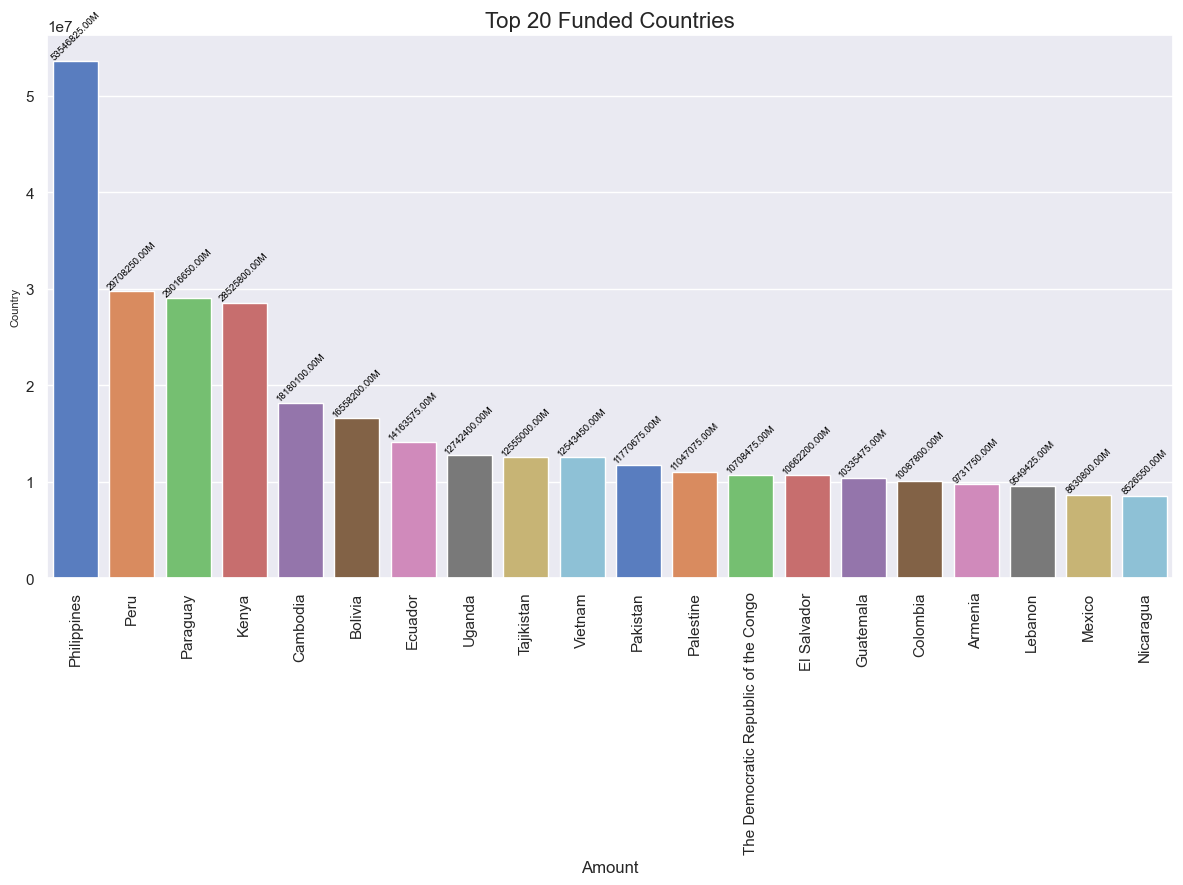

In [358]:
# getting the top 20 funded countries

top_funded = geo_loc.sort_values(by='funded_amount', ascending=False).head(20)

# Create a Seaborn barplot for the data
plt.figure(figsize=(12, 9))
sns.set()  

custom_palette = sns.color_palette("coolwarm")


ax = sns.barplot(y='funded_amount', x='country', data=top_funded,  palette="muted")


# Customize plot labels and titles
plt.title('Top 20 Funded Countries', fontsize=16)
plt.xlabel('Amount', fontsize=12)
plt.ylabel('Country', fontsize=8)

# Display the actual 'funded_amount' values within the bars
for p in ax.patches:
    height = p.get_height()
    plt.text(p.get_x() + p.get_width() / 2, height, f'{height:.2f}M', ha='center', va='bottom', fontsize=7, color='black',rotation=45)

plt.xticks(rotation=90)
# Display the plot
plt.tight_layout()  
plt.show()


`Observation`

>> From the plot above we can make the following observations:

1. **Philippines** received the highest funded amount among the listed countries, indicating a significant demand for financial assistance in the country.

2. **Peru** and **Paraguay** also received substantial funding, suggesting the presence of sizable lending programs or projects in these countries.

3. **Kenya** received a significant amount, reflecting the ongoing need for microfinance and financial support in the region.

4. **Cambodia**, **Bolivia**, and **Ecuador** are among the countries with substantial funding, indicating active borrowing and lending activities in these regions.

5. **Uganda**, **Tajikistan**, and **Vietnam** received notable amounts, highlighting their involvement in KIVA borrowing activities.

6. **Pakistan** and **Palestine** received considerable funding, indicating the demand for financial support in these regions.

7. **The Democratic Republic of the Congo**, **El Salvador**, **Guatemala**, and **Colombia** also received substantial funding, suggesting the presence of ongoing projects or lending programs.

8. **Armenia**, **Lebanon**, **Mexico**, and **Nicaragua** received comparatively lower but still significant amounts, indicating that these countries are active in KIVA's lending activities.

Overall, the data reflects the diversity of KIVA's lending portfolio, with various countries receiving funding, ranging from significant amounts to smaller but still noteworthy sums. These observations emphasize the global reach of KIVA's microfinance initiatives and the financial needs in these diverse regions.


In [355]:

# Calculate the top 20 country counts
top_20_countries = count.head(20)

# Create a Plotly bar plot
fig = px.bar(
    top_20_countries,
    x=top_20_countries.values,
    y=top_20_countries.index,
    orientation='h',
    text=top_20_countries.values,
    title='Top 20 Countries by borrowing frequency',
    height=700
)
color_palette = px.colors.qualitative.Dark24_r

# Customize the layout
fig.update_traces(marker_color=color_palette, textposition='outside')
fig.update_layout(xaxis_title='Count', yaxis_title='Country')

# Rotate y-axis labels for better visibility
fig.update_layout(yaxis=dict(categoryorder='total ascending'))

# Show the interactive plot
fig.show()


![new plot](newplot.png)


`Observations`

Based on the plot above we can make the following observations:

1. **Philippines** stands out as the country with the highest borrowing frequency, indicating a strong demand for microfinance services and loans in this region.

2. **Kenya** has a substantial borrowing frequency, suggesting an active borrowing and lending ecosystem in the country, likely driven by financial inclusion initiatives.

3. **Cambodia** and **Pakistan** also have relatively high borrowing frequencies, indicating a significant need for financial support in these nations.

4. **Peru** and **Uganda** have notable borrowing frequencies, reflecting the ongoing demand for microfinance and lending opportunities in these regions.

5. **Tajikistan** and **Colombia** follow with considerable borrowing frequencies, suggesting active participation in microfinance programs and lending activities.

6. **El Salvador**, **Ecuador**, and **Paraguay** have relatively high borrowing frequencies, indicating the presence of lending programs and a demand for financial services in these countries.

7. **India** follows with a substantial borrowing frequency, highlighting the demand for microfinance and financial support in this populous nation.

8. **Nicaragua**, **Vietnam**, and **Nigeria** have significant borrowing frequencies, suggesting the active involvement of these countries in microfinance initiatives.

9. **Bolivia** and **Palestine** have notable borrowing frequencies, indicating a demand for financial assistance and lending opportunities in these regions.

10. **Armenia**, **Guatemala**, and **Samoa** also exhibit substantial borrowing frequencies, reflecting the participation in microfinance programs and access to loans in these nations.

These observations indicate the diverse global demand for microfinance and financial support, with various countries actively participating in lending and borrowing activities to meet their financial needs and promote economic development.

#### `Highest Funded sectors`




In [362]:
# Group the 'final_df' DataFrame by 'sector' and calculate the sum of 'funded_amount' for each sector


sector_group = final_df.groupby('sector').agg({'funded_amount': 'sum'}).reset_index()


In [372]:
# Create a Plotly pie chart for the distribution of funded amounts by sector
fig = px.pie(
    sector_group,
    names='sector',
    values='funded_amount',
    title='Distribution of Funded Amounts by Sector',
    height=800,
    width= 1000,
    color_discrete_sequence=px.colors.qualitative.Dark2
)

# Show the interactive pie chart
fig.show()




![new plot](newplot2.png)

`Observation`

1. **Agriculture** received the highest total funded amount, as it is a critical sector for food production and economic development in many regions. Investment in agriculture can improve food security and boost rural economies.

2. **Food,** **Retail,** and **Education** sectors also received substantial funding, as they represent essential services and industries with a direct impact on people's lives and economic growth. This reflects a strong demand for support in these areas.

3. Sectors like **Arts,** **Entertainment,** and **Wholesale** received comparatively lower funding because they may not have the same level of economic impact or might be considered more niche sectors with lower demand for financing.

4. Sectors like **Transportation,** **Manufacturing,** and **Services** received moderate funding, reflecting their significance in providing goods and services and supporting economic activities.

5. The **Health,** **Construction,** and **Personal Use** sectors received intermediate funding, indicating the need for financial assistance in areas related to healthcare, infrastructure development, and personal well-being.

6. The **Clothing** and **Housing** sectors also received significant funding, underscoring their importance in improving living conditions and supporting local businesses.

The observations are explained by considering the economic and societal significance of each sector. Sectors with higher funding often address fundamental needs, while those with lower funding may have lower overall demand or less direct impact on the broader economy.

#### `Gender analysis`


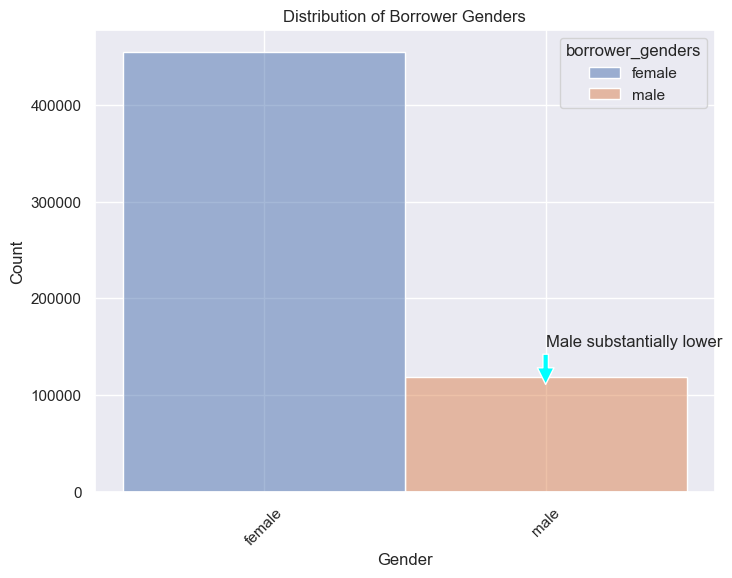

In [383]:

# Create a histplot for the "gender" column

plt.figure(figsize=(8, 6))
sns.histplot(data=final_df, x="borrower_genders", hue="borrower_genders")
plt.title("Distribution of Borrower Genders")
plt.xlabel("Gender")
plt.ylabel("Count")

plt.xticks(rotation=45) 
plt.annotate('Male substantially lower',                
             xy=("male", 110000),  
            xytext=("male", 150000), 
             arrowprops={'facecolor' : 'cyan', 'shrink':0.03})

plt.show()


`Observations`

1. Female borrowers exhibit a notably higher borrowing frequency compared to male borrowers.

2. The presence of specific economic empowerment initiatives is suggested by the higher frequency among female borrowers.

3. The data points to increased participation by women in entrepreneurial and business activities, potentially driving higher borrowing rates.

4. Gender roles and family support systems may be influencing the borrowing behavior of women.

5. Targeted marketing and outreach efforts towards women borrowers may be effective in driving their higher frequency of borrowing.

6. Variations in data collection and reporting practices could be contributing to the observed difference in borrowing frequency between genders.

In [384]:
# Grouping gender by funded amount

gender_group = final_df.groupby('borrower_genders').agg({'funded_amount': 'sum'}).reset_index()


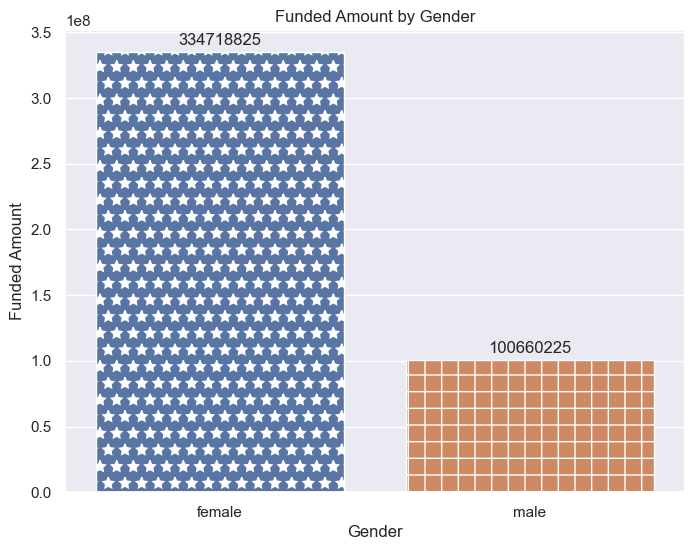

In [397]:

# Create a bar chart
plt.figure(figsize=(8, 6))
ax = sns.barplot(data=gender_group, x="borrower_genders", y="funded_amount")

# Add hatch patterns to the bars
bars = ax.patches
hatches = ['*', '+']
for bar, hatch in zip(bars, hatches):
    bar.set_hatch(hatch)

# Annotate each bar with the funded amount
for bar in bars:
    height = bar.get_height()
    ax.annotate(
        f'{height:.0f}',  # Format the funded amount as an integer
        xy=(bar.get_x() + bar.get_width() / 2, height),
        xytext=(0, 3),  # Offset for the annotation
        textcoords="offset points",
        ha='center',  # Horizontal alignment
        va='bottom'  # Vertical alignment
    )

plt.title("Funded Amount by Gender")
plt.xlabel("Gender")
plt.ylabel("Funded Amount")

plt.show()


`Observation`

1. Female borrowers received a significantly higher total funded amount than male borrowers, indicating a higher demand for financial assistance among women. This could be due to women facing more significant barriers to traditional financial services and thus turning to alternative lending sources.

2. Male borrowers received a lower total funded amount, suggesting that they may have more access to traditional financial institutions and, as a result, rely less on alternative sources of financing.

`Borrower Genders vs. Repayment Interval`

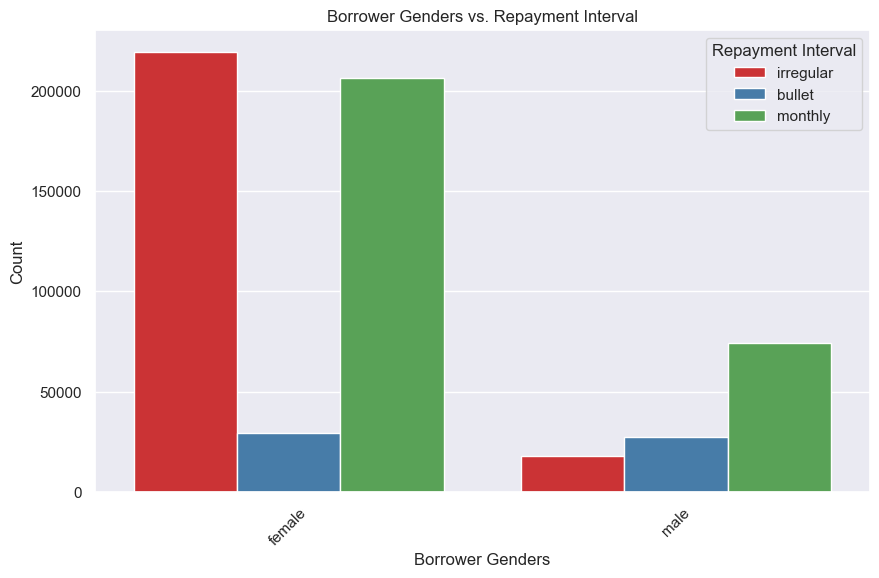

In [402]:

# Create a countplot

plt.figure(figsize=(10, 6))
sns.countplot(
    data=final_df,
    x="borrower_genders",
    hue="repayment_interval",
    palette="Set1"  
)
plt.title("Borrower Genders vs. Repayment Interval")
plt.xlabel("Borrower Genders")
plt.ylabel("Count")
plt.xticks(rotation=45)  
plt.legend(title="Repayment Interval")

plt.show()


`Observation`

1. **Monthly Repayment:** Both female and male borrowers predominantly opt for "monthly" repayment intervals. Among females, there are 206,408 cases with a monthly repayment schedule, while males have 74,217 such cases. This suggests that monthly payments are the most common and preferred choice for both genders.

2. **Irregular Repayment:** Irregular repayment intervals are more common among female borrowers, with 219,258 cases, compared to 17,734 cases among male borrowers. This could indicate that female borrowers may have more flexible repayment schedules or that their financial situations are more likely to lead to irregular payments.

3. **Bullet Repayment:** The data shows that female borrowers also have a higher count of "bullet" repayment intervals, with 29,262 cases, compared to 27,236 cases among male borrowers. "Bullet" repayments often involve paying off the principal in a lump sum at the end of the loan term, and this choice seems more prevalent among female borrowers.





`Highest borrowing countries split along gender lines`

In [435]:
# Group the 'final_df' DataFrame by both 'country' and 'borrower_genders' and calculate the sum of 'funded_amount' for each group.
grouped_data = final_df.groupby(["country", "borrower_genders"])["funded_amount"].sum().reset_index()

# Sort the grouped data by the total 'funded_amount' in descending order to find the top 20 entries.
sorted_data = grouped_data.sort_values(by="funded_amount", ascending=False)

# Select the top 20 entries with the highest total 'funded_amount'.
sorted_data = sorted_data.head(20)



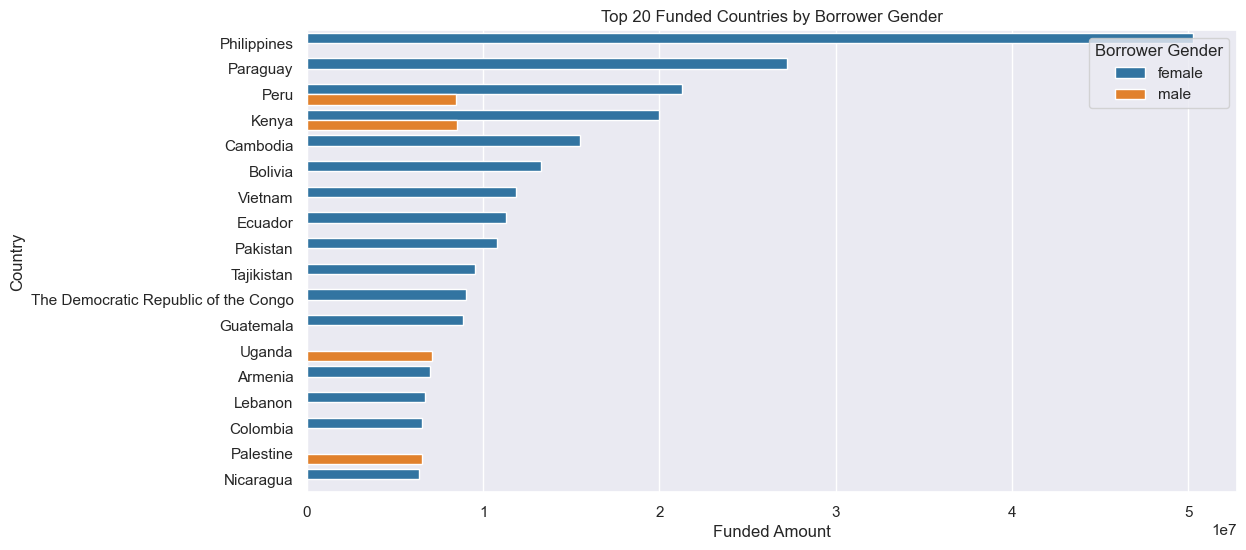

In [487]:
# Define a custom color palette using the "tab10" color scheme from Seaborn
custom_palette = sns.color_palette("tab10")

# Set the custom color palette for Seaborn to use
sns.set_palette(custom_palette)

# Create a new figure with a specified size for the barplot
plt.figure(figsize=(12, 6))

# Create a barplot using Seaborn, specifying the data, y-axis as "country," x-axis as "funded_amount," and hue as "borrower_genders"
sns.barplot(
    data=sorted_data,
    y="country",
    x="funded_amount",
    hue="borrower_genders"
)

# Set the title for the barplot
plt.title("Top 20 Funded Countries by Borrower Gender")

# Label the y-axis as "Country"
plt.ylabel("Country")

# Label the x-axis as "Funded Amount"
plt.xlabel("Funded Amount")

# Add a legend with the title "Borrower Gender"
plt.legend(title="Borrower Gender")

# Display the barplot
plt.show()


`Observation`

>> From the plot, we can derive the following insights:

1. **Philippines Leads in Female Borrowing:** The Philippines stands out as the country with the highest total funded amount for female borrowers, indicating a significant demand for financial support among women in this nation.

2. **Paraguay and Peru Follow:** Paraguay and Peru also have substantial funding for female borrowers, suggesting the presence of sizable lending programs or initiatives focused on women's financial empowerment in these countries.

3. **Kenya Shows Strong Female Participation:** Kenya ranks among the top countries for female borrowing, emphasizing the active participation of women in microfinance and lending activities in this region.

4. **Female Borrowing Dominance:** The majority of the countries listed have a higher total funded amount for female borrowers, indicating that women often lead in seeking financial assistance in these areas.

5. **Male Borrowing:** While females dominate the funding amounts in most countries, it's worth noting that males also participate in borrowing, with Kenya, Peru, and Uganda showing significant male borrowing activities.

6. **Armenia and Lebanon:** Armenia and Lebanon are examples of countries where female borrowers received considerable funding, suggesting that microfinance and lending programs in these nations actively support women.

7. **Palestine's Male Borrowing:** Palestine stands out as a country where male borrowers received a substantial amount of funding, highlighting the financial inclusion of males in this region.

8. **Overall Gender Inclusivity:** The data reflects gender-inclusive financing activities, with both males and females participating in borrowing, albeit with varying degrees of funding across different countries.



`Conclusions`:

1. **Diverse Global Borrowing Landscape:** The data and observations reveal a diverse global landscape of borrowing activities, with varying borrowing frequencies and funded amounts across different countries and regions.

2. **Gender Inclusivity in Microfinance:** The data highlights the active participation of both men and women in microfinance and lending activities. Gender-inclusive microfinance programs are essential to address the unique financial needs of all borrowers.

3. **Economic and Regional Variations:** Borrowing patterns are influenced by economic conditions and regional factors. Some countries exhibit higher borrowing rates, potentially due to factors like the presence of microfinance institutions or specific economic activities.

4. **Importance of Monthly Repayments:** Monthly repayment intervals are the preferred choice for borrowers in most regions, indicating the importance of offering flexible and manageable repayment schedules.

5. **Agriculture and Essential Services:** Sectors like agriculture, food, and education receive substantial funding, emphasizing their significance in economic development and livelihood improvement.

6. **Active Participation in South America:** South American countries, such as Peru, Bolivia, and Paraguay, exhibit high borrowing frequencies, possibly driven by common economic activities or financial needs.

7. **Significant Borrowing in Southeast Asia:** The Philippines leads in borrowing, underlining the importance of microfinance and online lending platforms in addressing financial needs and promoting financial inclusion in the country.

8. **Challenges and Opportunities:** Challenges related to data quality, cultural sensitivity, and regulatory compliance must be addressed when implementing microfinance programs. However, there are substantial opportunities for impact and empowerment through effective microfinance strategies.



`Recommendations`:

1. **Continued Focus on Gender-Inclusive Microfinance:** Given the significant difference in funding amounts and borrowing frequencies between genders, it's essential to continue promoting and supporting gender-inclusive microfinance initiatives. This can include targeted marketing, financial literacy programs, and entrepreneurship support for both men and women.

2. **Country-Specific Strategies:** Tailor microfinance strategies to the unique needs and demands of each country. For example, in countries like the Philippines and Paraguay where female borrowing is high, create and expand programs that empower women economically. In regions with lower female borrowing, explore strategies to promote gender balance.

3. **Data Quality and Consistency:** Ensure that data collection methods are consistent and reliable across all regions. Invest in data quality checks and verification processes to reduce potential biases in reporting.

4. **Monitoring and Evaluation Tools:** Implement data analytics and reporting tools to track borrowing trends over time. Tools like Tableau or Power BI can help create dynamic dashboards for visualizing and reporting on the data.

5. **Feedback Mechanisms:** Establish feedback mechanisms for borrowers to provide input on their experiences and needs. This can be done through surveys, interviews, or focus group discussions to fine-tune microfinance programs.

6. **Social and Economic Research:** Collaborate with research institutions to conduct in-depth studies on the impact of microfinance on both genders. Understand the social and economic factors that influence borrowing behavior and repayment intervals.

`Challenges`:

1. **Data Privacy and Security:** Managing sensitive financial data requires robust security measures to protect borrower information.

2. **Cultural Sensitivity:** Different regions have unique cultural norms and expectations regarding financial matters. Implementing strategies should respect and align with these cultural sensitivities.

3. **Economic Fluctuations:** Economic conditions can change, impacting borrowing behavior. Be prepared to adapt strategies in response to economic shifts.

4. **Regulatory Compliance:** Ensure compliance with financial regulations in each country to avoid legal issues.

5. **Impact Measurement:** Measuring the impact of microfinance programs can be complex and may require longitudinal studies to determine their effectiveness.

6. **Diversity of Borrowers:** Recognize that the borrower base is diverse, and a one-size-fits-all approach may not be suitable for all regions and demographics.





**1. For Tracking and Reporting Metrics:**

   - **Tool Recommendation:** Use **Tableau** or **Power BI** to create customized dashboards and reports based on your dataset. These tools allow you to visually track and report on borrowing frequencies, funded amounts, and repayment intervals, providing dynamic insights specific to your data.

**2. Gender-Inclusive Microfinance Strategies:**

   - **Recommendation:** Develop and implement tailored microfinance strategies based on data-driven insights for countries where significant gender disparities are observed. Collaborate with women's empowerment organizations and conduct ethnographic research to address the unique financial needs of female borrowers.

**3. Country-Specific Strategies:**

   - **Recommendation:** Customize microfinance strategies to align with the economic and cultural contexts of each country. Utilize GIS tools like **ArcGIS** to map borrowing trends and identify regions where country-specific strategies are needed.

**4. Data Quality and Consistency:**

   - **Recommendation:** Implement data quality checks and validation processes within your chosen data analytics tool (e.g., Tableau or Power BI). Ensure that data is consistently collected, categorized, and reported accurately to reduce potential biases in gender or country-specific metrics.

**5. Monitoring and Evaluation Tools:**

   - **Tool Recommendation:** Use customized dashboards in **Tableau** or **Power BI** to monitor the effectiveness of microfinance programs and track changes in borrowing trends over time. Visualize the impact of gender-inclusive strategies and country-specific initiatives.

**6. Feedback Mechanisms:**

   - **Recommendation:** Employ online survey tools such as **SurveyMonkey** or **Qualtrics** to gather direct feedback from borrowers. Use these surveys to assess borrower experiences, identify areas for improvement, and refine microfinance strategies.

**7. Advanced Data Analytics and Machine Learning:**

   - **Recommendation:** Utilize advanced data analytics tools like Python with libraries such as Pandas, NumPy, and Scikit-Learn for in-depth data analysis. Consider applying machine learning models to predict borrowing trends and optimize lending strategies specific to your dataset.

**8. Microfinance Management Software:**

   - **Recommendation:** Explore the adoption of microfinance management software tailored to your organization's specific needs. Utilize software like **Mambu** or **NLS Banking Solutions** to streamline operations, monitor borrower activities, and generate custom reports based on gender and location.

**9. Social Impact Assessment:**

   - **Recommendation:** Implement the Social Return on Investment (SROI) framework to assess the broader social and economic impacts of microfinance initiatives, considering the specific dataset and observations. Quantify the positive effects of lending programs in a way that aligns with your data.

**10. Ethnographic Research and Fieldwork:**

   - **Recommendation:** Conduct ethnographic research and fieldwork in regions where significant borrowing disparities between genders or countries are observed. This approach will provide in-depth insights into cultural and social factors influencing borrowing behavior, directly addressing your data-specific observations.

